In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression as ols

In [2]:
advertising = pd.read_csv('../Data/Advertising.csv', index_col = 0)

In [3]:
# Model and Data for Figure 3.1
model = sm.OLS(advertising.Sales, sm.add_constant(advertising.TV))
results = model.fit()
error_bars = []
for x,y,f in zip(advertising.TV,advertising.Sales,results.fittedvalues):
    error_bars += [(x,x), (y,f), 'g']

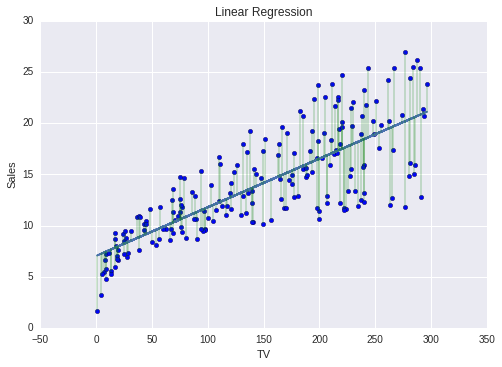

In [4]:
# Plot in Figure 3.1
# BTW, plotting the error bars was a pain in the ass.
# I ended up using this method: http://stackoverflow.com/a/21352863/4499429
# If you know a better method, please share
plt.scatter(advertising.TV,advertising.Sales)
plt.plot(advertising.TV,results.fittedvalues)
plt.plot(*error_bars, alpha=0.2)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Linear Regression")

In [5]:
# general Residual Sum of Squares depends only on Predicted and Actual values
def RSS(predicted, actual):
    return sum( (x-y)**2 for x,y in zip(predicted,actual))

In [6]:
RSS(results.fittedvalues, advertising.Sales)

2102.5305831313517

In [7]:
# In case you wanted direct computations like in the book
def cov(x,y):
    # covariance between X and Y
    n = len(x)
    x_mu = sum(x)/n
    y_mu = sum(y)/n
    return sum( (i-x_mu)*(j-y_mu) for i,j in zip(x,y))/n
    
def find_betas(x,y):
    Beta1 = cov(x,y)/cov(x,x)
    Beta0 = sum(y)/len(y) - Beta1*sum(x)/len(x)
    return Beta0, Beta1

def predict(B0, B1, x):
    return [ B0 + B1*i for i in x]

In [8]:
b0, b1 = find_betas(advertising.TV, advertising.Sales)
y_predicted = predict(b0,b1,advertising.TV)
RSS(y_predicted, advertising.Sales)

2102.5305831313522

In [9]:
# TODO: recreate the contour and 3-D plot on page 63
# delta = 0.025
# x = np.arange(-3.0, 3.0, delta)
# y = np.arange(-2.0, 2.0, delta)
# X, Y = np.meshgrid(x, y)

In [10]:
Credit = advertising = pd.read_csv('../Data/Credit.csv', index_col=0)

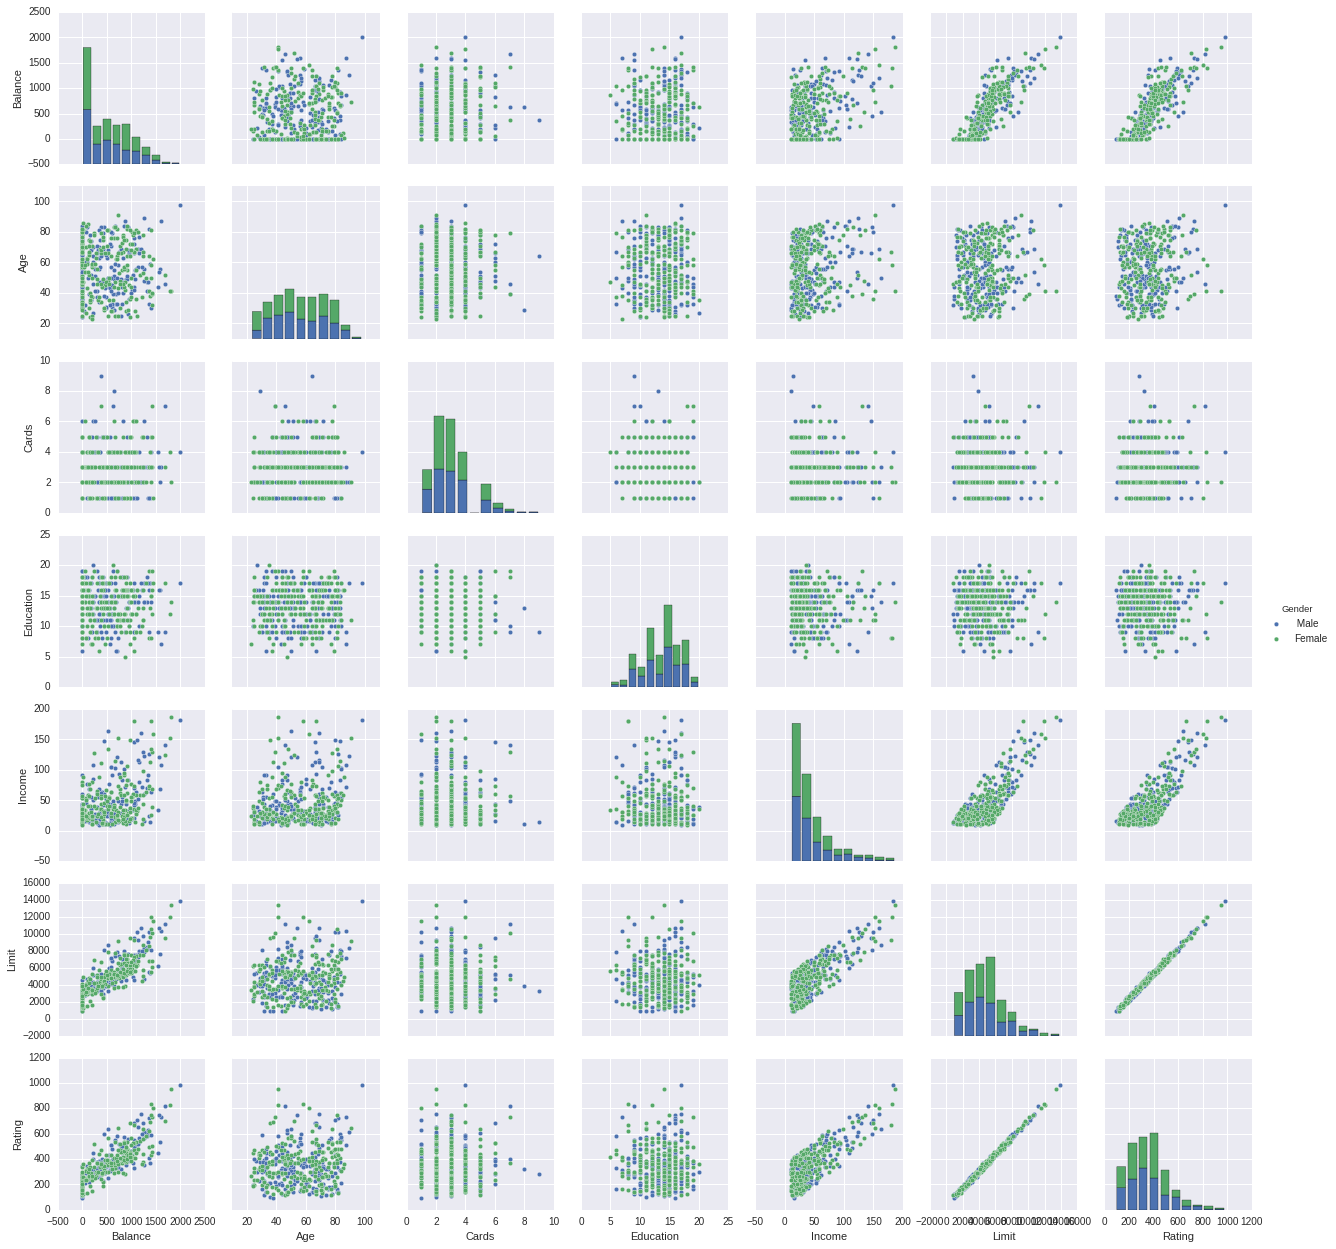

In [11]:
# this has a beautiful output naturally, the vars argument is just to achieve the same order as on page 83
sns.pairplot(Credit, vars = ['Balance', 'Age', 'Cards', 'Education', 'Income', 'Limit', 'Rating'], hue= 'Gender')

In [12]:
Auto = advertising = pd.read_csv('../Data/Auto.csv', na_values='?')

In [13]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [14]:
# fitting a polynomial regression using numpy's polyfit
# dropping NA values for sipmlicity
Auto = Auto.dropna()
x = Auto.horsepower.values
y = Auto.mpg.values

In [15]:
# the polyfit returns the coefficients
# the poly1d turns them into a polynomial function p(x)
# see http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.polyfit.html
degree1 = np.polyfit(x,y,1)
degree2 = np.polyfit(x,y,2)
degree5 = np.polyfit(x,y,5)
p1 = np.poly1d(degree1)
p2 = np.poly1d(degree2)
p5 = np.poly1d(degree5)

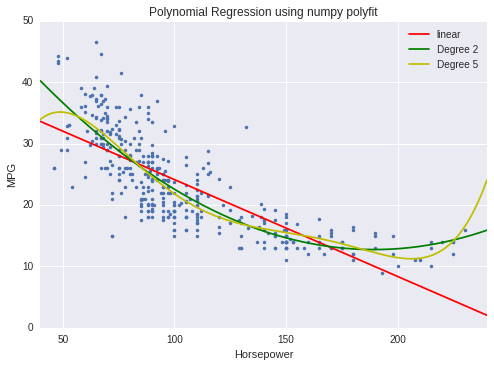

In [16]:
xp = np.linspace(40,240,400)
plt.plot(x, y, '.')
plt.plot(xp, p1(xp), 'r-', label='linear')
plt.plot(xp, p2(xp), 'g-', label='Degree 2')
plt.plot(xp, p5(xp), 'y-', label='Degree 5')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.xlim(40,240)
plt.title('Polynomial Regression using numpy polyfit')
plt.legend()

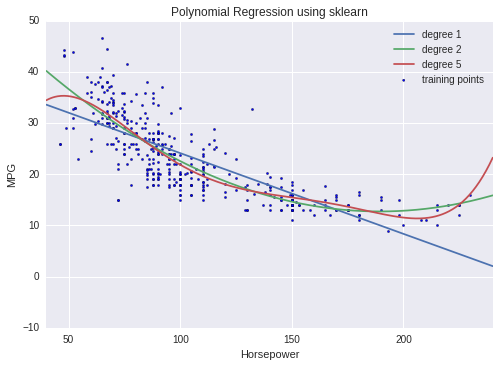

In [17]:
# now using sklearn- code modified from the example found here: http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# generate points used to plot
x_plot = xp

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

plt.scatter(x, y, marker='.', label="training points")

for degree in [1, 2, 5]:
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, label="degree {}".format(degree))

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.xlim(40,240)
plt.title('Polynomial Regression using sklearn')
plt.legend()

In [97]:
s = sum(i**2 for i in range(10))
print((s/10)**0.5, sum(i for i in range(10))/10)

5.338539126015656 4.5


In [40]:

Auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000
